# PROJECT-2 TWITTER SENTINENT ANALYSIS

## Importing Libraries and Datasets 

In [1]:
#Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
train_tweets = pd.read_csv('train.csv')
test_tweets = pd.read_csv('test.csv')

## Exploratory Data Analysis 

In [3]:
train_tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
test_tweets

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [5]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
test_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [7]:
train_tweets.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
test_tweets.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


In [9]:
train_tweets.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [10]:
test_tweets.isnull().any()

id       False
tweet    False
dtype: bool

In [11]:
train_tweets.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Index(['id', 'label', 'tweet'], dtype='object')

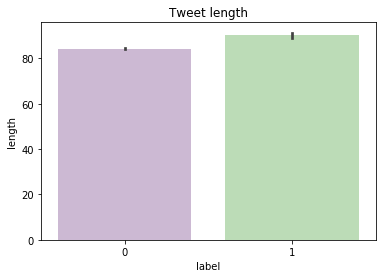

In [12]:
train_tweets['length']=train_tweets['tweet'].apply(len)
sns.barplot(x='label',y='length',data = train_tweets,palette='PRGn')
plt.title('Tweet length')
train_tweets.drop('length',axis=1,inplace=True)
train_tweets.columns

Text(0.5, 1.0, 'Count of Positive and Negative Tweets')

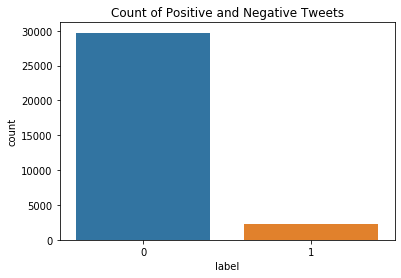

In [13]:
sns.countplot(x= 'label',data = train_tweets)
plt.title('Count of Positive and Negative Tweets')

## Data cleaning - Removing Punctuations

In [14]:
import string
exclude = set(string.punctuation)
valid=set(string.printable)
def remove_punctuation(x):
    try:
        x = ''.join(ch for ch in x if ch not in exclude and ch in valid)
    except:
        pass
    return x

In [15]:
# Before removing puntuations
train_tweets.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [16]:
# After removing punctuations
train_tweets.tweet = train_tweets.tweet.apply(remove_punctuation)
test_tweets.tweet = test_tweets.tweet.apply(remove_punctuation)

In [17]:
train_tweets.head(10)

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
5,6,0,22 huge fan fare and big talking before they l...
6,7,0,user camping tomorrow user user user user use...
7,8,0,the next school year is the year for exams can...
8,9,0,we won love the land allin cavs champions clev...
9,10,0,user user welcome here im its so gr8


In [18]:
test_tweets.sample(5)

,id,tweet
7909,39872,model i love u take with u all the time in u...
12068,44031,alex weekend trip killarney gaming insomniair...
4832,36795,details painting a figurative color abstract
10190,42153,user happy thoughts happy lives visualize wh...
14279,46242,obama had his what difference does it make hil...


###Removing Stopwords, Unwanted Expressions, Hyperlinks 


In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
useless_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [20]:
useless_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
train_tweets['tweet'] = train_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (useless_words)]))
test_tweets['tweet'] = test_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (useless_words)]))

In [22]:
train_tweets.sample(5)

,id,label,tweet
29884,29885,0,user looks like gave sanders much credit last ...
14233,14234,0,bad enough able see braydon weeks time staing ...
18694,18695,0,going beach one time head disney reso perfect
12801,12802,0,thankful peace thankful positive
20828,20829,1,nc monster law made republican lawmakers disen...


In [23]:
test_tweets.sample(3)

,id,tweet
5662,37625,fathers day fathers thereblessedlovefamily
6893,38856,today poor westvirginia stands example usa use...
8690,40653,holiday fun socially relevant podcast celebrat...


In [24]:
#Remove Unwanted Expressions
import re
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a

In [25]:
train_tweets.tweet = train_tweets.tweet.apply(clean)
test_tweets.tweet = test_tweets.tweet.apply(clean)

In [26]:
#Lemmatization
nltk.download('wordnet')
w = WordNetLemmatizer()
train_tweets.tweet = train_tweets.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))
train_tweets.head()



[nltk_data] Downloading package wordnet to C:\Users\DELL
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user user thank lyft credit cant use cause don...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [27]:
test_tweets.tweet = test_tweets.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))
test_tweets.head()

,id,tweet
0,31963,studiolife aislife require passion dedication ...
1,31964,user white supremacists want everyone see new ...
2,31965,safe ways heal acne altwaystoheal healthy heal
3,31966,hp curse child book reservations already yes h...
4,31967,3rd bihday amaze hilarious nephew eli ahmir un...


In [28]:
#Remove HyperLinks
train_tweets['tweet'] = train_tweets['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
test_tweets['tweet'] = test_tweets['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [29]:
test_tweets.sample(6)

,id,tweet
12881,44844,fuck boyfriend sex
7904,39867,user woo teamfosse hit p5 budget firsttime tea...
9871,41834,leap unknown scary result reward youcandoit
8618,40581,thankyou user nurse guacamole yes please nurse...
1437,33400,show value tableau seminar public sector today...
10185,42148,user hang baskets ready summer flower pub dors...


In [30]:
train_tweets.sample(6)

,id,label,tweet
8340,8341,0,pamper look forward weekend away viewinghouses...
19205,19206,0,wake spraydaily user user user
17051,17052,1,user might libtard libtard sjw liberal politics
10747,10748,0,record bitch run tough onna gram
20508,20509,0,copa america argentinien dank messi weiter blo...
18398,18399,0,user havent get wife im black jewish gay manyo...


# TFIDF Vectorization and Balencing Dataset

In [3]:
x=train_tweets.drop('tweet',axis=1)
y=train_tweets['tweet'].apply(lambda x:1 if x=='positive' else 0)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(25569, 2) (6393, 2) (25569,) (6393,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vec= tfid.fit_transform(train_tweets.tweet)
vec.shape

(31962, 41392)

In [7]:
features = tfid.get_feature_names()
features

['00',
 '000',
 '000001',
 '001',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0606',
 '0608',
 '0609',
 '0610',
 '0612',
 '0613',
 '0616',
 '0616ç',
 '0617',
 '0618',
 '0618â',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '07788427999',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0k',
 '0shares',
 '0tolerancemovie',
 '0ï',
 '0ð',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000â',
 '1001',
 '10014',
 '10021',
 '10025',
 '10040',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happydaysâ',
 '100happysongs',
 '100k',
 '100ml',
 '100â',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '101ð',
 '1024x589',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '109',
 '10a',
 '10am',
 '10days',

In [8]:
#Importing Smote
!pip install imblearn
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state=42)
g,h=s.fit_sample(vec,train_tweets.label)

In [9]:
print(g.shape)
print(h.shape)

(59440, 41392)
(59440,)


In [10]:
pd.Series(h).value_counts()

1    29720
0    29720
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(g,h,test_size=0.2)

# Model Building

In [16]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
y_pred=bnb.predict(x_test)

# Check the Accuracy of model

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("accuracy score",accuracy_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))
print("precision score",precision_score(y_pred,y_test))
print("recall score",recall_score(y_pred,y_test))

accuracy score 0.9704744279946165
f1 score 0.9707767879443843
precision score 0.9879681409930521
recall score 0.9541734860883797
